### Experiment 5

!pip install jupyter notebook numpy pandas matplotlib seaborn scikit-learn category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [2]:
DATA_URL = "https://raw.githubusercontent.com/KamalMahanna/KIIT/refs/heads/main/GAN/cars.csv"
df = pd.read_csv(DATA_URL)
print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Loaded dataset shape: (100, 13)
Columns: ['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [3]:
df.sample(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
20,21,Toyota,Innova,2018,50000,Diesel,Manual,First,13,2755,171,7,1400000
70,71,Tata,Safari,2018,42000,Diesel,Manual,First,14,1956,150,7,1300000
18,19,BMW,5 Series,2019,24000,Diesel,Automatic,First,18,1995,187,5,3000000
35,36,Volkswagen,Ameo,2020,15000,Petrol,Automatic,Third,19,1197,74,5,500000
77,78,Toyota,Yaris,2020,18000,Petrol,Manual,First,17,1496,106,5,650000


In [4]:
# removing car_id as it is unnecessary
df.drop('Car_ID',axis=1,inplace=True)

In [5]:
# checking for missing values
df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


In [7]:
for col in df.columns:
    if df[col].dtype == object:
        # only allowing alpha numerics and removing extra spaces, making lower cases
        cleaned = df[col].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", "", x ))
        cleaned = cleaned.str.lower().apply(lambda x: ' '.join(x.split(' ')))
        
        try:
            num = pd.to_numeric(cleaned, errors="coerce")
            # if converting yields many numeric values, replace column
            if num.notna().sum() / len(num) > 0.8:
                df[col] = num
                print(f"Converted column {col} to numeric-like dtype.")
        except Exception:
            print('CLeaned : ',col)
            df[col] = cleaned

In [8]:
# Inspect types
print("\nDtypes:\n", df.dtypes)


Dtypes:
 Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object


In [9]:
target_col = 'Price'

In [10]:
df[target_col].describe()

count    1.000000e+02
mean     1.574000e+06
std      1.000265e+06
min      4.500000e+05
25%      7.000000e+05
50%      1.300000e+06
75%      2.500000e+06
max      4.000000e+06
Name: Price, dtype: float64

In [11]:
df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [12]:
# actual numerical column
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

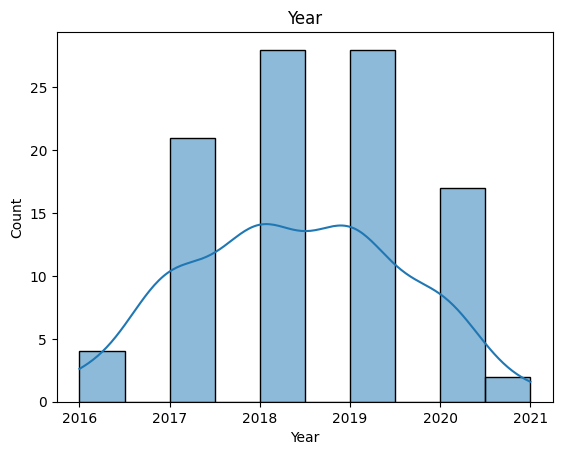

Skewness of Year is 0.0012434937642409128


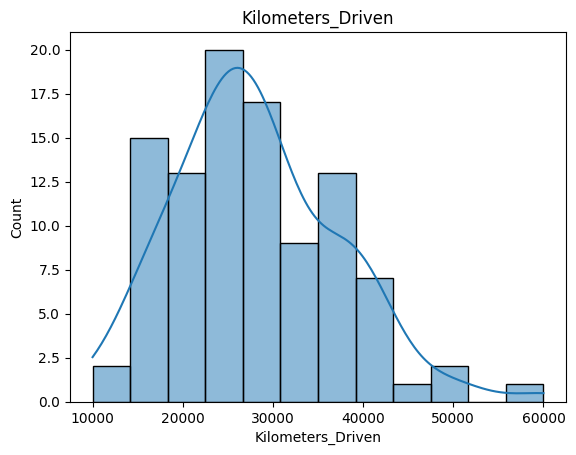

Skewness of Kilometers_Driven is 0.621260913755414


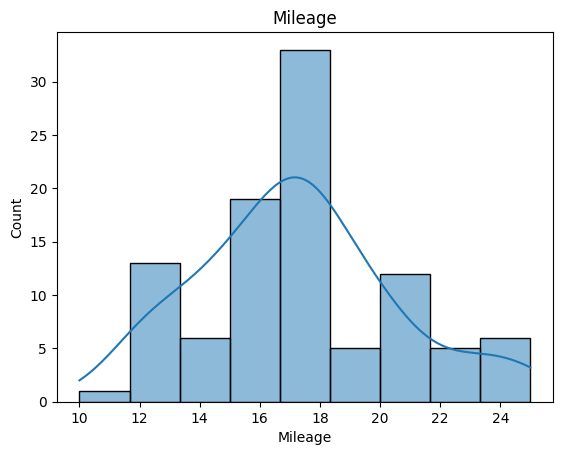

Skewness of Mileage is 0.3725835384765463


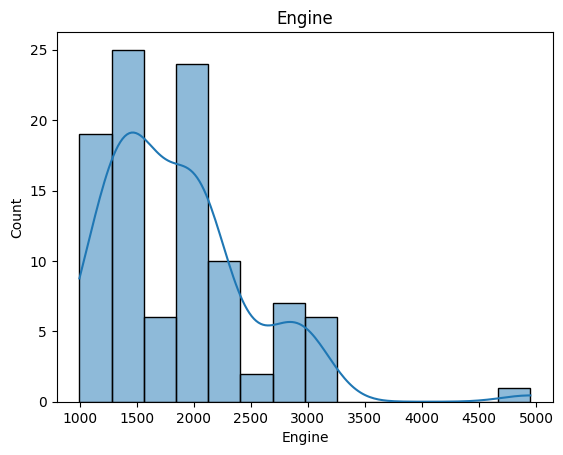

Skewness of Engine is 1.552713557044638


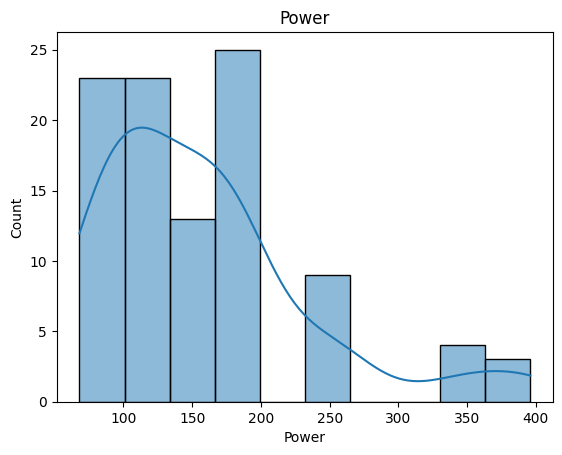

Skewness of Power is 1.4332792850844196


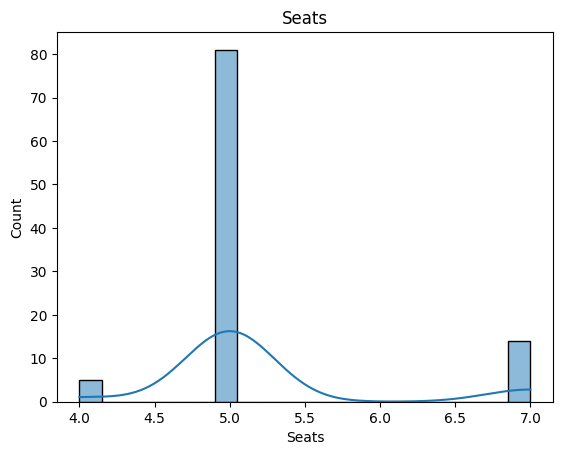

Skewness of Seats is 1.644321831691185


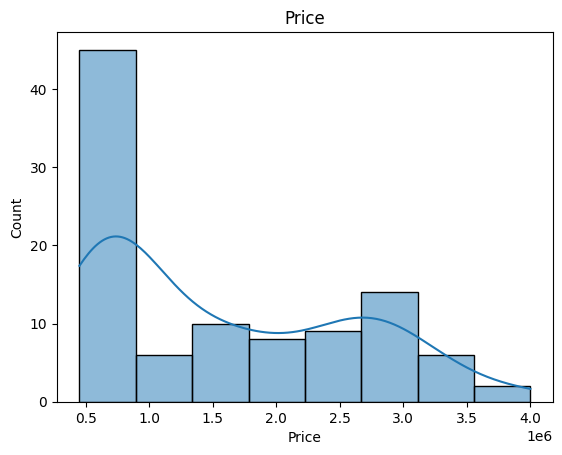

Skewness of Price is 0.6142859340595381


In [13]:
# checking the distribution of numerical columns
for i in numeric_cols:
    sns.histplot(df[i],kde=True,)
    plt.title(i)
    plt.show()
    print(f"Skewness of {i} is {df[i].skew()}")

most data are following right skewed distribution

## Experiment 6

In [14]:
numeric_cols.remove(target_col) if target_col in numeric_cols else None

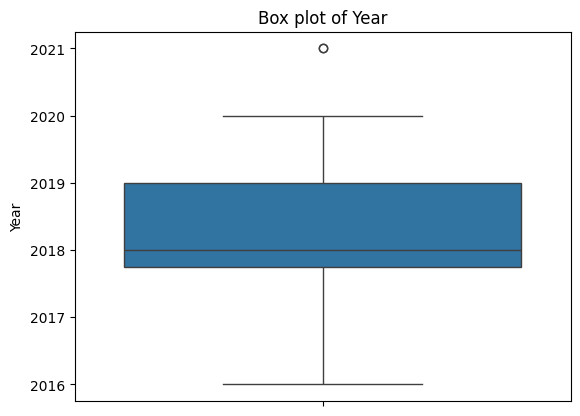

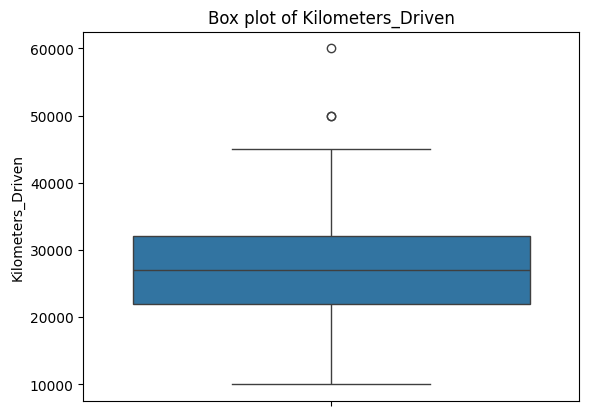

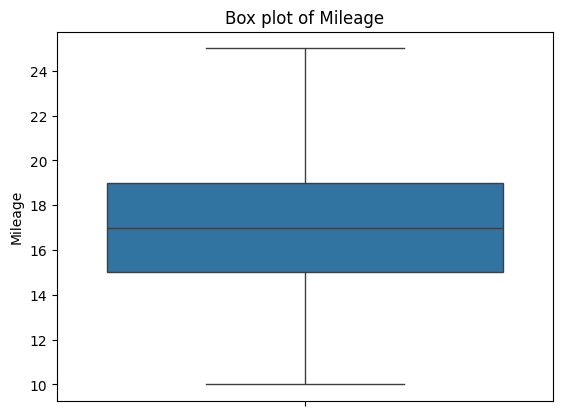

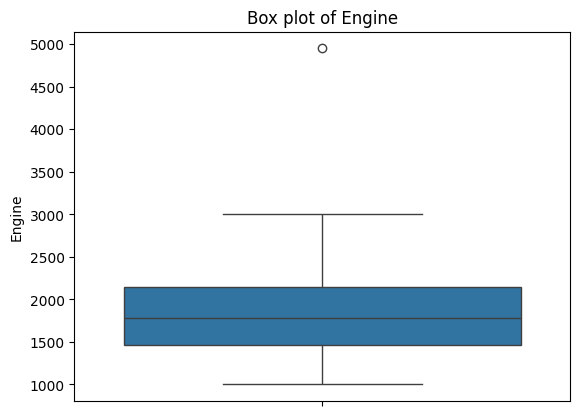

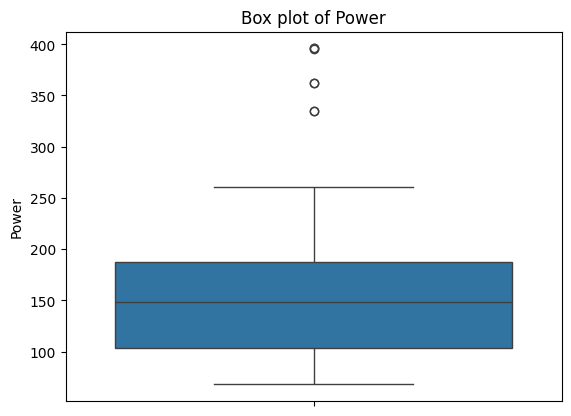

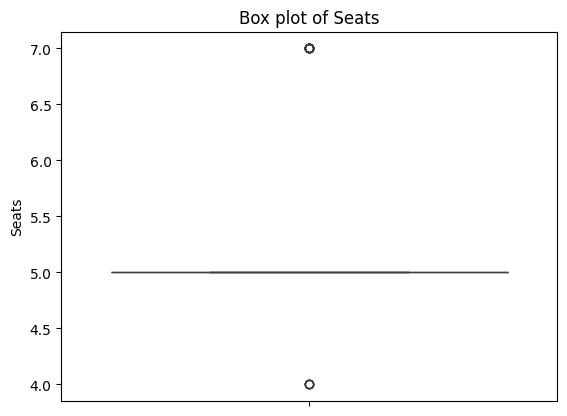

In [15]:
# checking box plot
for i in numeric_cols:
    sns.boxplot(y=df[i])
    plt.title(f"Box plot of {i}")
    plt.show()

In [16]:
# Outlier detection: Use IQR method for numeric columns
def detect_outliers_iqr(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return lower, upper

In [17]:
outlier_bounds = {}
for col in numeric_cols + [target_col]:
    ser = df[col].dropna()
    lower, upper = detect_outliers_iqr(ser, k=1.5)
    outlier_bounds[col] = (lower, upper)
    pct_out = ((ser < lower) | (ser > upper)).mean()
    print(f"{col}: lower={lower:.3f}, upper={upper:.3f}, pct_out={pct_out:.3%}")


Year: lower=2015.875, upper=2020.875, pct_out=2.000%
Kilometers_Driven: lower=7000.000, upper=47000.000, pct_out=3.000%
Mileage: lower=9.000, upper=25.000, pct_out=0.000%
Engine: lower=440.500, upper=3164.500, pct_out=1.000%
Power: lower=-23.000, upper=313.000, pct_out=7.000%
Seats: lower=5.000, upper=5.000, pct_out=19.000%
Price: lower=-2000000.000, upper=5200000.000, pct_out=0.000%


In [18]:
# checking outliers for each column with z score method
from scipy import stats
z_scores = stats.zscore(df[numeric_cols + [target_col]].dropna())
outlier_threshold = 3
outlier_indices = np.where(z_scores > outlier_threshold)
print(f"Number of outliers detected using Z-score method: {len(outlier_indices)}")

Number of outliers detected using Z-score method: 2


In [19]:
# capping outlier columns at 1st and 99th percentiles
for col in ["Kilometers_Driven", "Engine", "Power"]:
    if col in df.columns:
        low = df[col].quantile(0.01)
        high = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=low, upper=high)

/tmp/ipykernel_141393/2208429758.py:6: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].clip(lower=low, upper=high)


## Experiment 7

In [20]:
# feature engineering
from datetime import datetime
CURRENT_YEAR = datetime.now().year  # will be 2025 in your environment
# Age of car
df["Age"] = CURRENT_YEAR - df["Year"].astype(int)

# Avoid division by zero for Age; replace 0 with 0.5 for km/year calc if needed
df["Age_safe"] = df["Age"].replace(0, 0.5)

# Kilometers per year
df["Km_per_year"] = df["Kilometers_Driven"] / df["Age_safe"]

# Power per cc (power to engine capacity ratio)
df["Power_per_cc"] = df["Power"] / df["Engine"].replace(0, np.nan)

# Flag: large SUV / 7 seats
df["Is_7seat"] = (df["Seats"] >= 7).astype(int)

In [21]:
df.sample(5)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Age_safe,Km_per_year,Power_per_cc,Is_7seat
60,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497.0,113,5,850000,6,6,4000.000000,0.075484,0
5,Tata,Nexon,2019,35000,Petrol,Manual,First,17,1198.0,108,5,750000,6,6,5833.333333,0.090150,0
45,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498.0,148,5,1600000,6,6,3666.666667,0.098798,0
43,Maruti,S-Cross,2020,15000,Petrol,Automatic,Second,18,1462.0,103,5,700000,5,5,3000.000000,0.070451,0
91,Mahindra,XUV300,2019,26000,Diesel,Manual,Second,20,1497.0,115,5,700000,6,6,4333.333333,0.076820,0


In [22]:
# Example of bucketizing Mileage into categories
def mileage_bucket(x):
    try:
        x = float(x)
    except:
        return "unknown"
    if x <= 15:
        return "low_mileage"
    if x <= 20:
        return "mid_mileage"
    return "high_mileage"

df["Mileage_bucket"] = df["Mileage"].apply(mileage_bucket)

In [23]:
df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,Age_safe,Km_per_year,Power_per_cc,Is_7seat,Mileage_bucket
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498.00,108,5,800000,7,7,7142.857143,0.072096,0,low_mileage
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597.00,140,5,1000000,6,6,6666.666667,0.087664,0,mid_mileage
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,3017.53,395,4,2500000,8,8,2500.000000,0.130902,0,low_mileage
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248.00,74,5,600000,5,5,6000.000000,0.059295,0,high_mileage
4,Hyundai,Sonata,2016,50100,Diesel,Automatic,Second,18,1999.00,194,5,850000,9,9,5566.666667,0.097049,0,mid_mileage


<Axes: title={'center': 'Price Distribution'}, ylabel='Frequency'>

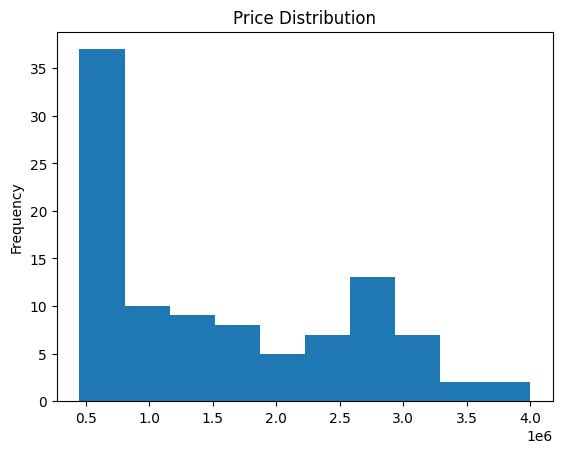

In [24]:
df['Price'].plot.hist( title='Price Distribution')

In [25]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1),df[['Price']], test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 17), (20, 17), (80, 1), (20, 1))

In [27]:
# scaling numerical columns except target
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Price') if 'Price' in num_cols else None

In [28]:
# using standard scaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [29]:
X_train.sample(5)

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age,Age_safe,Km_per_year,Power_per_cc,Is_7seat,Mileage_bucket
91,Mahindra,XUV300,0.566572,-0.245878,Diesel,Manual,Second,0.952607,-0.690080,-0.623690,-0.305066,-0.566572,-0.566572,0.189693,-0.328241,-0.420084,mid_mileage
84,Audi,Q7,-1.112160,0.228103,Diesel,Automatic,First,-0.891148,1.870041,1.030575,2.263910,1.112160,1.112160,-0.448314,-0.085069,2.380476,low_mileage
37,BMW,7 Series,0.566572,-0.719859,Diesel,Automatic,First,-0.583856,1.915323,1.234177,-0.305066,-0.566572,-0.566572,-0.539458,0.110514,-0.420084,low_mileage
62,Mahindra,Thar,2.245304,-2.141802,Diesel,Manual,First,-0.583856,0.506385,-0.432813,-1.589554,-2.245304,-2.245304,-1.815472,-1.059129,-0.420084,low_mileage
6,Mahindra,Scorpio,-0.272794,2.005532,Diesel,Automatic,Second,-0.583856,0.497677,-0.305562,2.263910,0.272794,0.272794,2.481311,-0.859431,2.380476,low_mileage


In [30]:
# converting object type columns to categorical
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_bucket']

In [31]:
for i in cat_cols:
    print(f"Unique values in {i}:",X_train[i].value_counts() )
    print("-"*30)

Unique values in Brand: Brand
Audi          10
Ford          10
BMW            9
Tata           8
Mercedes       8
Toyota         7
Hyundai        7
Volkswagen     7
Honda          5
Maruti         5
Mahindra       4
Name: count, dtype: int64
------------------------------
Unique values in Model: Model
Mustang          3
Altroz           3
A6               2
A5               2
Camry            2
Ranger           2
X5               2
WR-V             2
X3               2
C-Class          2
E-Class          2
Fortuner         2
Vento            2
Venue            2
3 Series         2
A3               2
Passat           2
Thar             2
S-Cross          2
Innova Crysta    2
GLA              2
Santro           2
Verna            2
7 Series         2
EcoSport         2
Q7               2
Polo             1
Endeavour        1
Tigor            1
Tiguan           1
Nexon            1
Ameo             1
Elantra          1
City             1
X1               1
GLE              1
Scorpio     

In [32]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')

In [33]:
cat_cols

['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_bucket']

In [34]:
cont_cols = [col for col in X_train.columns if col not in cat_cols]
cont_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Age',
 'Age_safe',
 'Km_per_year',
 'Power_per_cc',
 'Is_7seat']

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, cat_cols),
        ('num', 'passthrough', cont_cols)
    ]
)

In [36]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

/home/kamal/Desktop/KIIT/GAN/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [37]:
# Create a DataFrame with new column names
ohe = preprocessor.named_transformers_['cat']
encoded_col_names = ohe.get_feature_names_out(cat_cols)
X_train = pd.DataFrame(X_train_transformed, columns=list(encoded_col_names) + cont_cols)
X_test = pd.DataFrame(X_test_transformed, columns=list(encoded_col_names) + cont_cols)

In [38]:
X_train.sample(5)

,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,...,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Age_safe,Km_per_year,Power_per_cc,Is_7seat
47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.245878,0.952607,-1.217779,-0.890917,-0.305066,-0.566572,-0.566572,0.189693,-0.247673,-0.420084
26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.549325,0.338022,-0.751035,-0.776391,-0.305066,-1.405938,-1.405938,-1.268609,-0.597367,-0.420084
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.719859,0.338022,0.177226,0.292519,-0.305066,-0.566572,-0.566572,-0.539458,0.386485,-0.420084
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.820580,-1.505733,0.530767,-0.076510,2.263910,1.112160,1.112160,0.235265,-0.536852,2.380476
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.193840,0.952607,-1.209071,-1.005443,-0.305066,-1.405938,-1.405938,-0.612373,-0.578733,-0.420084


In [39]:
X_test.sample(5)

,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,...,Kilometers_Driven,Mileage,Engine,Power,Seats,Age,Age_safe,Km_per_year,Power_per_cc,Is_7seat
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.008887,1.259899,-0.688339,-0.840017,2.263910,0.272794,0.272794,-0.174882,-0.809953,2.380476
16,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.245878,-1.505733,1.920547,2.519414,-0.305066,0.272794,0.272794,-0.487376,1.531355,-0.420084
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.193840,0.030729,-0.691822,-0.738216,-0.305066,-1.405938,-1.405938,-0.612373,-0.580288,-0.420084
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.598008,-0.583856,-0.688339,-0.712766,-0.305066,0.272794,0.272794,3.262544,-0.527868,-0.420084
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.193840,0.030729,-0.691822,-0.738216,-0.305066,-1.405938,-1.405938,-0.612373,-0.580288,-0.420084


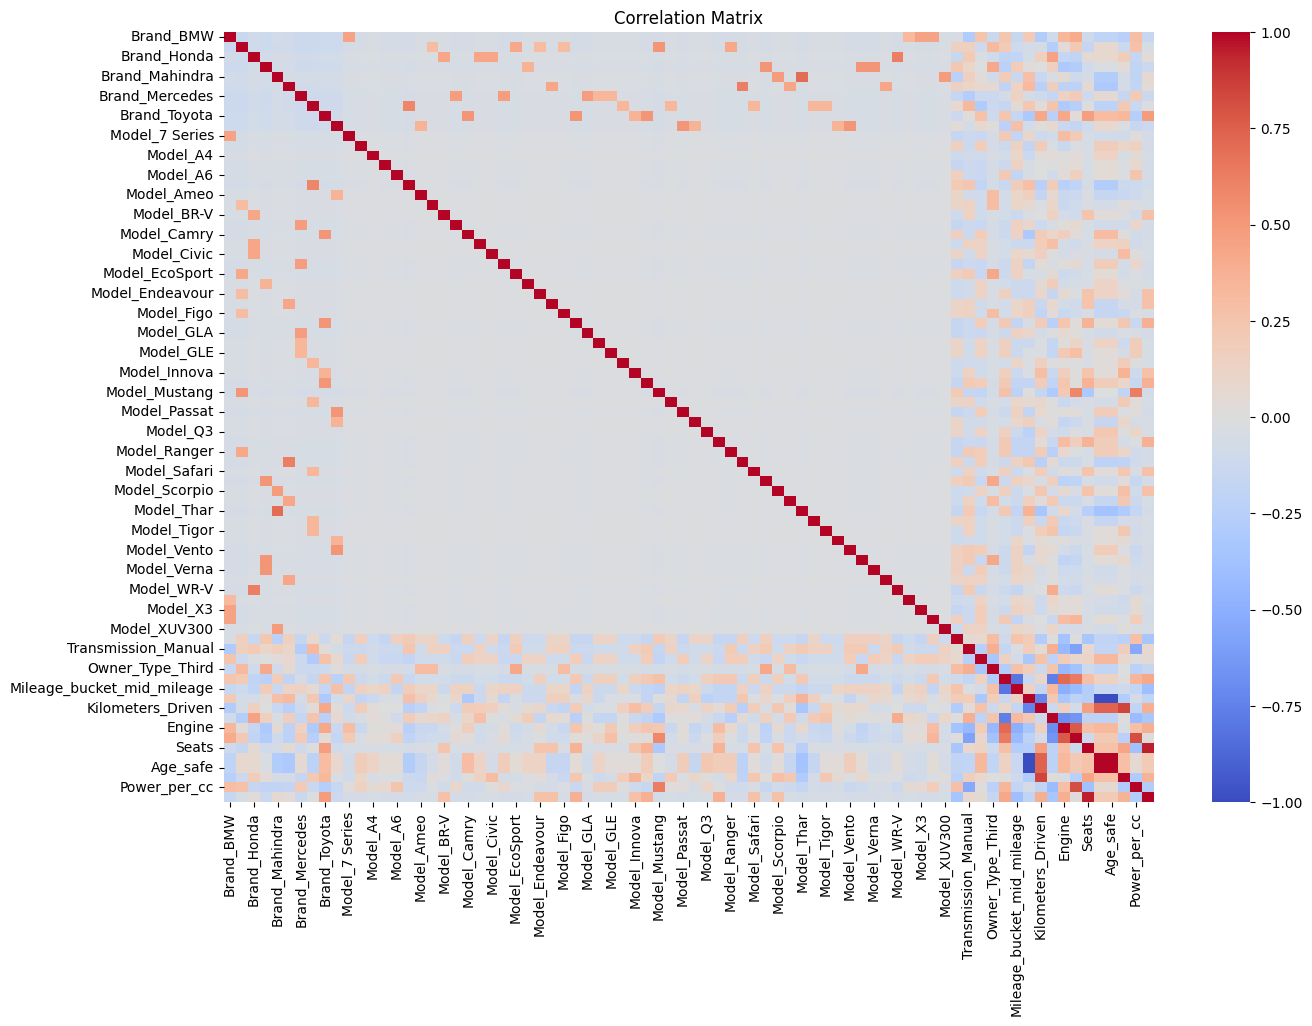

In [40]:
# now checking the correlation matrix
plt.figure(figsize=(15,10))
corr = X_train.corr()
sns.heatmap(corr, annot=False,  cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

checking which feature is more important

In [41]:

# Assume X_train, y_train are already defined
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train.values.ravel())

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
importance_df = pd.DataFrame({
    'Importance': rf.feature_importances_
},index=X_train.columns).sort_values(by='Importance', ascending=False)

Text(0.5, 1.0, 'Feature Importances from Random Forest')

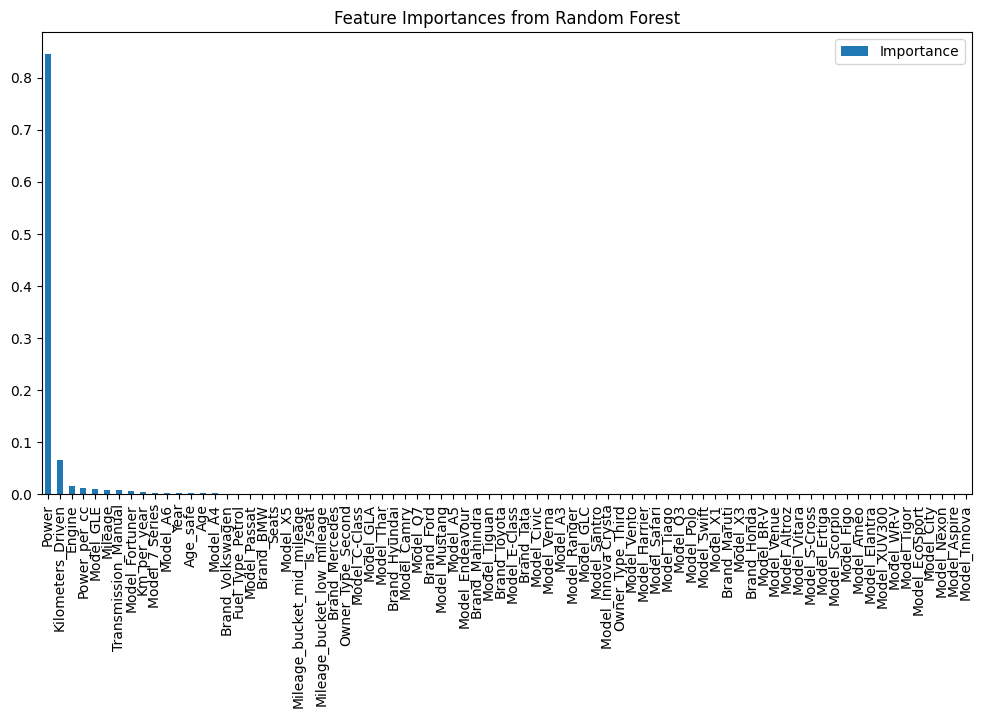

In [43]:
importance_df.plot.bar(figsize=(12,6))
plt.title("Feature Importances from Random Forest")

In [44]:
# getting features that have importance more than 0.01
important_features = importance_df[importance_df['Importance'] > 0.01].index.tolist()
print("Important features (importance > 0.01):", important_features)

Important features (importance > 0.01): ['Power', 'Kilometers_Driven', 'Engine', 'Power_per_cc']


These 4 features has more predicting power to predict price of cars

Text(0.5, 1.0, 'Feature Correlation with Target Variable')

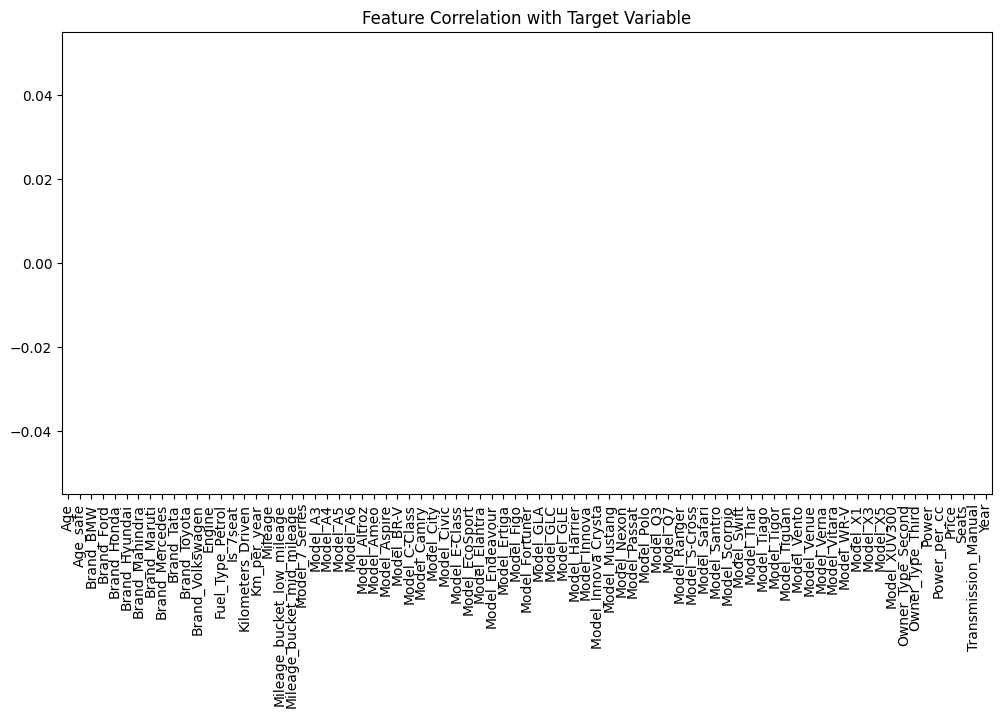

In [45]:
# ckecking correlation with target variable
full_train = X_train.corrwith(y_train)
full_train = full_train.sort_values(ascending=False)
full_train.plot.bar(figsize=(12,6))
plt.title("Feature Correlation with Target Variable")


## Experiment 8

In [46]:
# trying with multiple lineear regression, decision tree and random forest regressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "GaussianProcess": GaussianProcessRegressor(),
    "MLPRegressor": MLPRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
}

In [47]:
model_scores = {'MAE':[], 'RMSE':[], 'R2':[]}
for i in models:
    model = models[i]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    model_scores['MAE'].append(mae)
    model_scores['RMSE'].append(rmse)
    model_scores['R2'].append(r2)

    print(f"{i} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")

LinearRegression - MAE: 158224.93, RMSE: 304184.94, R2: 0.8869
Ridge - MAE: 195187.19, RMSE: 298857.30, R2: 0.8908
Lasso - MAE: 285513.37, RMSE: 511546.96, R2: 0.6800
ElasticNet - MAE: 349519.10, RMSE: 442451.14, R2: 0.7606
DecisionTree - MAE: 215000.00, RMSE: 442436.44, R2: 0.7607
RandomForest - MAE: 210600.00, RMSE: 401850.75, R2: 0.8026
ExtraTrees - MAE: 106725.00, RMSE: 271180.59, R2: 0.9101
GradientBoosting - MAE: 184908.85, RMSE: 379347.24, R2: 0.8240
AdaBoost - MAE: 226051.93, RMSE: 456540.32, R2: 0.7452
SVR - MAE: 819993.82, RMSE: 959290.60, R2: -0.1252
KNeighbors - MAE: 277000.00, RMSE: 390025.64, R2: 0.8140
GaussianProcess - MAE: 393739.63, RMSE: 587869.51, R2: 0.5774
MLPRegressor - MAE: 1179977.09, RMSE: 1486667.81, R2: -1.7024


/home/kamal/Desktop/KIIT/GAN/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


XGBoost - MAE: 184238.66, RMSE: 375549.51, R2: 0.8276
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 14
[LightGBM] [Info] Start training from score 1672500.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [48]:
model_scores

{'MAE': [158224.93428329626,
  195187.18572612194,
  285513.3707942846,
  349519.09797402157,
  215000.0,
  210600.0,
  106725.0,
  184908.84671121574,
  226051.9323671498,
  819993.822780716,
  277000.0,
  393739.63489919825,
  1179977.0887104857,
  184238.65625,
  255988.60999626768,
  100855.56099419689],
 'RMSE': [304184.936528129,
  298857.29856488627,
  511546.96353454696,
  442451.1395669851,
  442436.4361125788,
  401850.7496571333,
  271180.59019774996,
  379347.2434756009,
  456540.32238489826,
  959290.6015711658,
  390025.64018279617,
  587869.5068601423,
  1486667.807927833,
  375549.5132842006,
  440670.21202242817,
  253428.5227318657],
 'R2': [0.8868637578888282,
  0.8907920952430133,
  0.6800387651752582,
  0.7606370227986505,
  0.7606529314666504,
  0.8025505593935318,
  0.910082640459742,
  0.8240455693189009,
  0.7451500079925331,
  -0.12519222138872554,
  0.8140001222718103,
  0.5774401698404512,
  -1.702428527393713,
  0.827551007270813,
  0.7625600834335248,
  0.

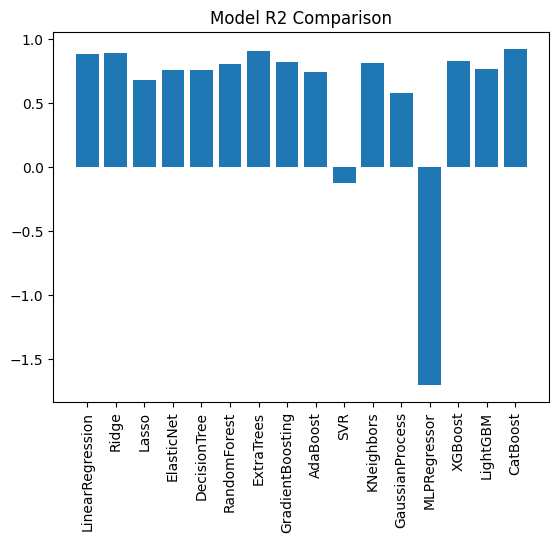

In [49]:
# comparing model performance

plt.bar(models.keys(), model_scores['R2'])
plt.xticks(rotation=90)
plt.title("Model R2 Comparison")
plt.show()

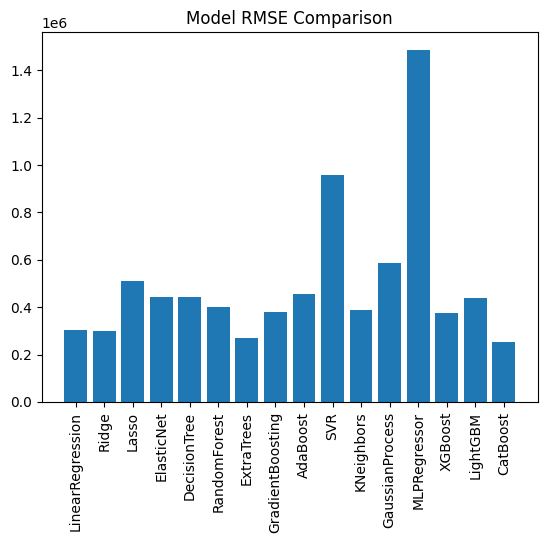

In [50]:
plt.bar(models.keys(), model_scores['RMSE'])
plt.xticks(rotation=90)
plt.title("Model RMSE Comparison")
plt.show()

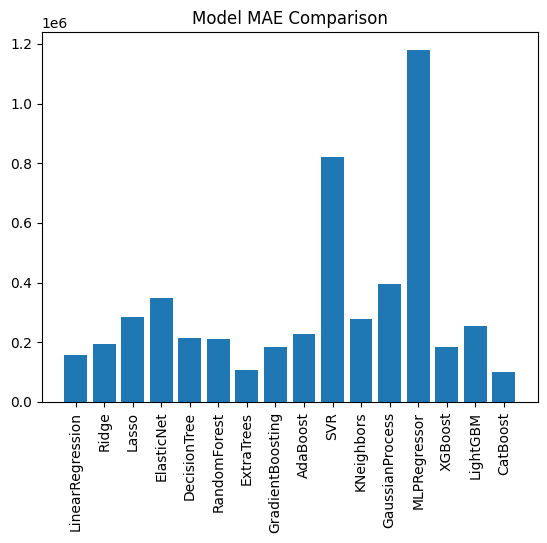

In [51]:
plt.bar(models.keys(), model_scores['MAE'])    
plt.xticks(rotation=90)
plt.title("Model MAE Comparison")
plt.show()

for our dataset `CatBoost` gives us best result

{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(),
 'Lasso': Lasso(),
 'ElasticNet': ElasticNet(),
 'DecisionTree': DecisionTreeRegressor(),
 'RandomForest': RandomForestRegressor(),
 'ExtraTrees': ExtraTreesRegressor(),
 'GradientBoosting': GradientBoostingRegressor(),
 'AdaBoost': AdaBoostRegressor(),
 'SVR': SVR(),
 'KNeighbors': KNeighborsRegressor(),
 'GaussianProcess': GaussianProcessRegressor(),
 'MLPRegressor': MLPRegressor(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, 

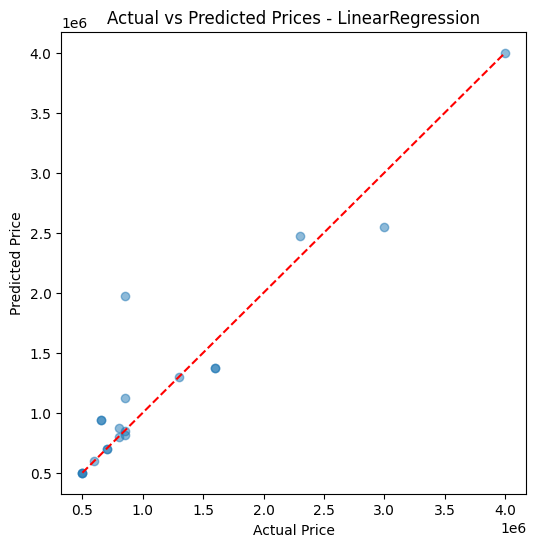

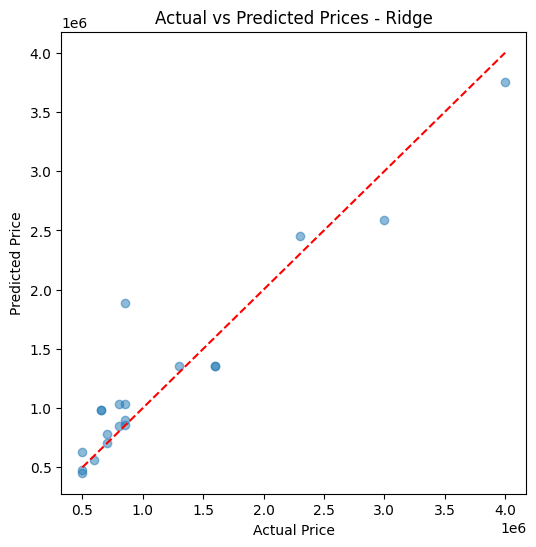

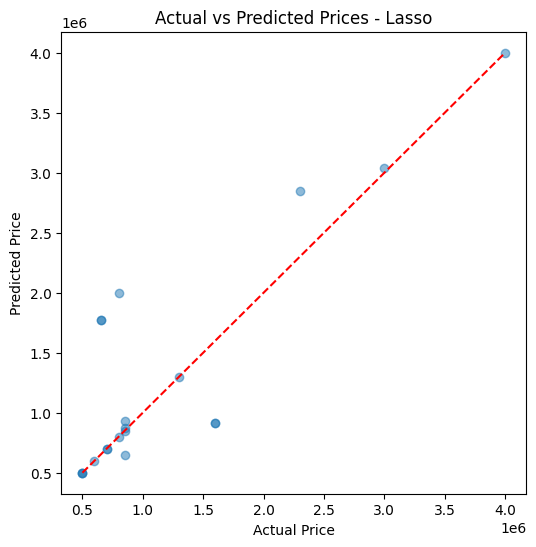

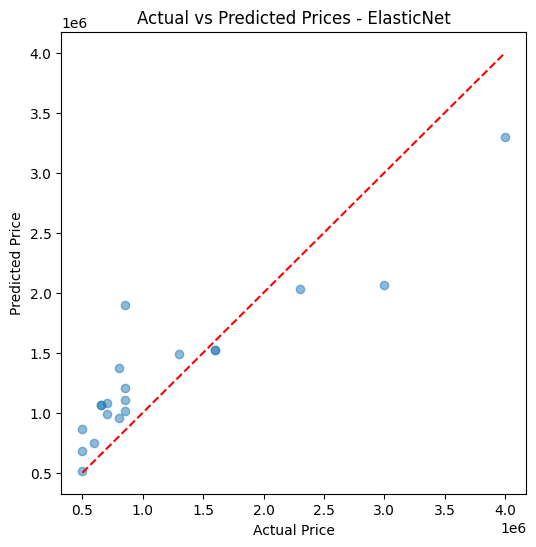

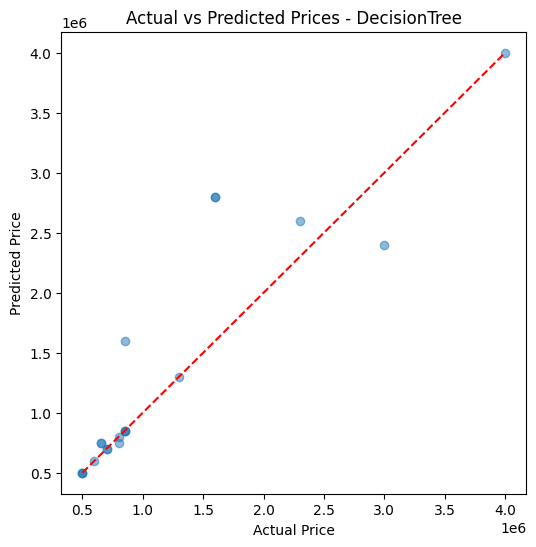

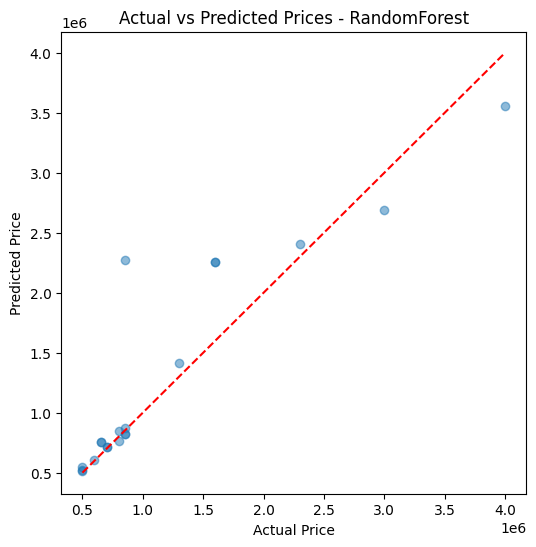

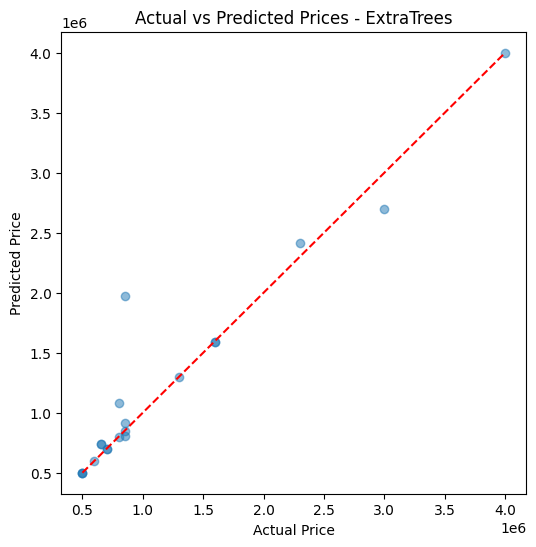

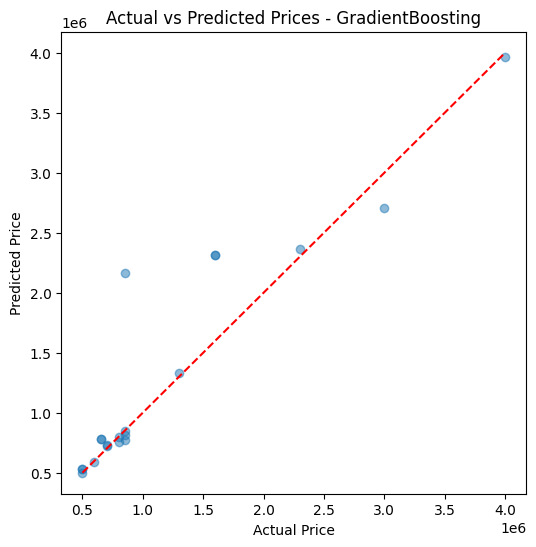

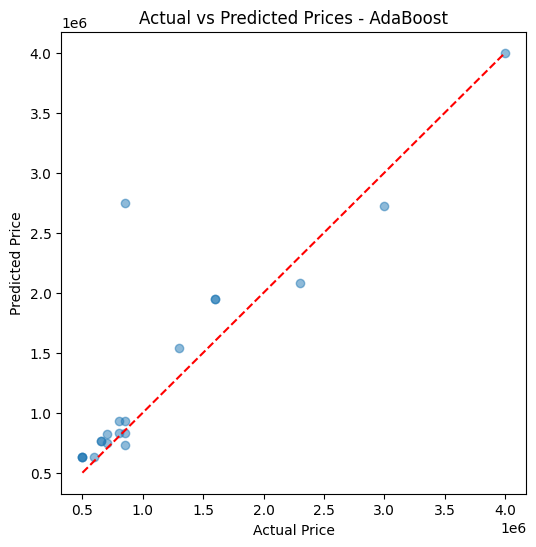

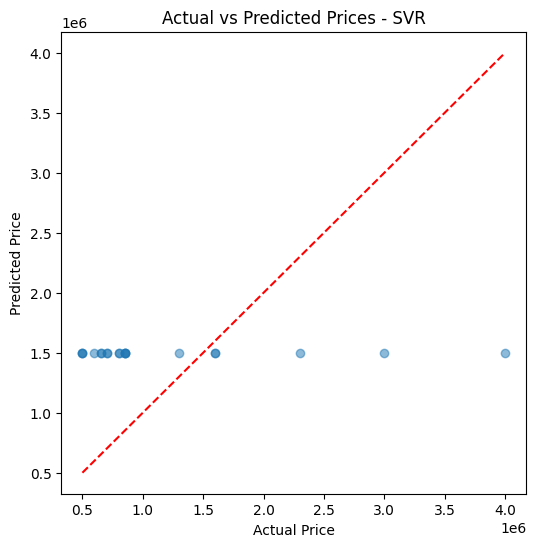

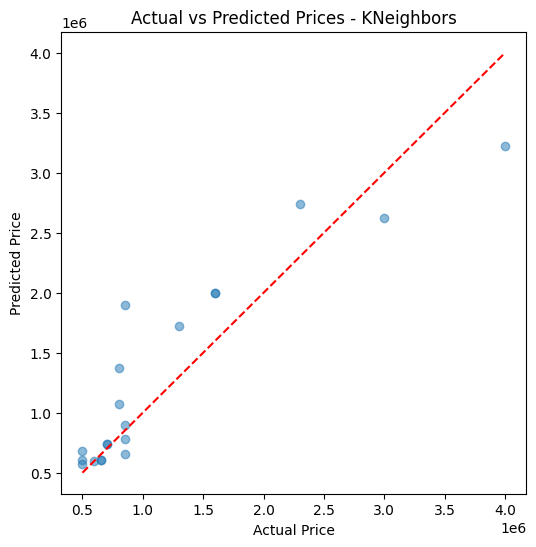

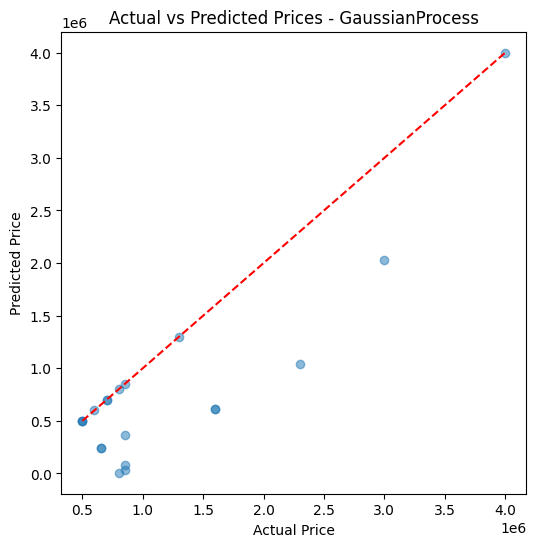

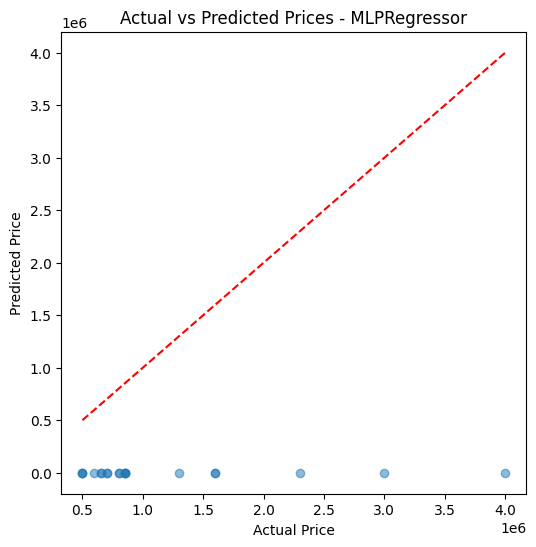

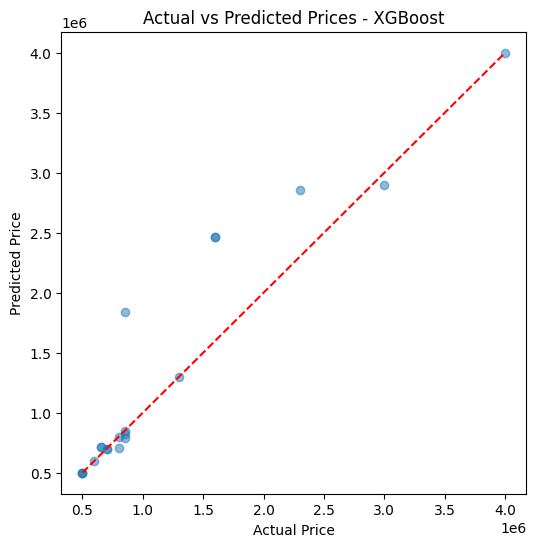

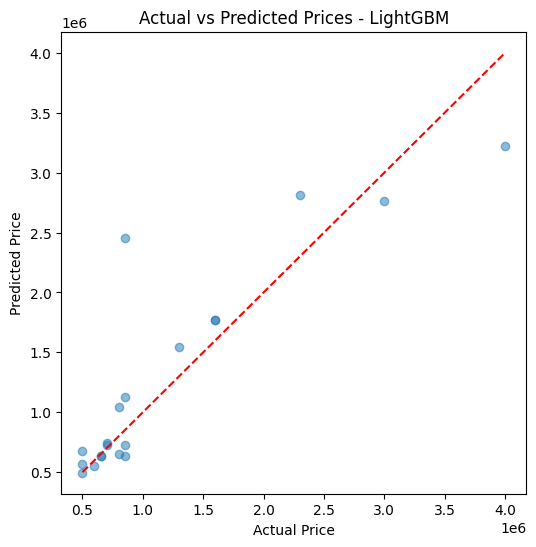

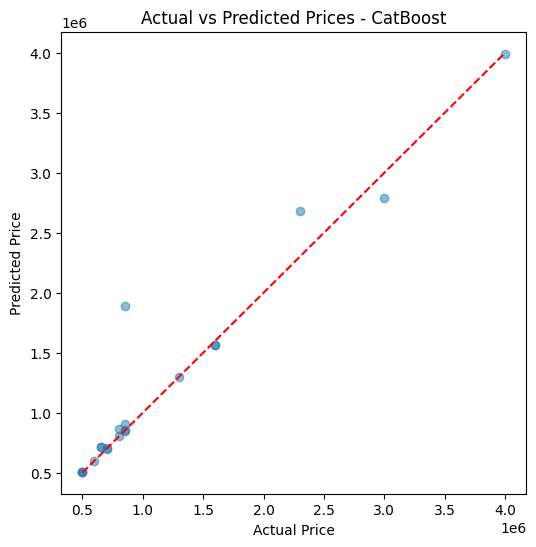

In [53]:
# now ploting scatterplot between actual and predicted
for model in models:
    y_pred = models[model].predict(X_test)
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted Prices - {model}")
    plt.show()